# Simple Linear Regression 

In this example we will consider sales based on 'TV' marketing budget. 

In this notebook, we'll build a linear regression model to predict 'Sales' using 'TV' as the predictor variable.


## Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [2]:
import pandas as pd

In [3]:
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: C:\Users\PC-Udaya\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [4]:
import matplotlib.pyplot as plt

In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: C:\Users\PC-Udaya\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


Now, let's check the structure of the advertising dataset.

In [6]:
advertising = pd.read_csv('E:\\python project\\New folder\\tvmarketing.csv', encoding='utf-8')


In [7]:
# Display the first 5 rows
#print(advertising.to_string())
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [8]:
# Display the last 5 rows
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [9]:
# Let's check the columns
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [10]:
# Check the shape of the DataFrame (rows, columns)
advertising.shape

(200, 2)

In [11]:
# Let's look at some statistical information about the dataframe.
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


# Visualising Data Using Plot

<Axes: xlabel='TV', ylabel='Sales'>

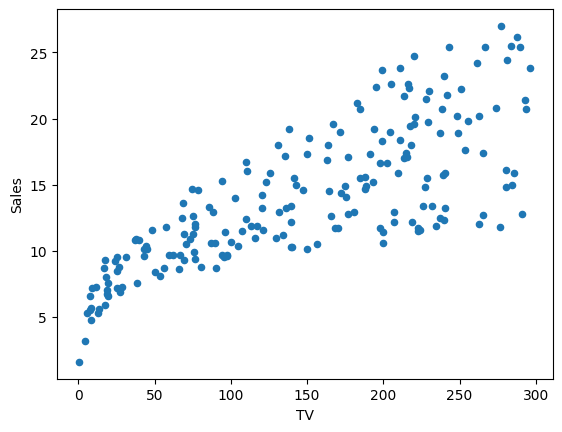

In [12]:
# Visualise the relationship between the features and the response using scatterplots
advertising.plot(x='TV',y='Sales',kind='scatter')

# Perfroming Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

### Generic Steps in Model Building using ```sklearn```

Before you read further, it is good to understand the generic structure of modeling using the scikit-learn library. Broadly, the steps to build any model can be divided as follows: 

## Preparing X and y

-  The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
-  However, X can be a dataframe as Pandas is built over NumPy.

In [23]:
# Putting feature variable to X
X= advertising[['TV']]

# Print the first 5 rows
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [14]:
# Putting response variable to y
y = advertising['Sales']

# Print the first 5 rows
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

## Splitting Data into Training and Testing Sets

In [24]:
#random_state is the seed used by the random number generator, it can be any integer.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=42)

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


## Performing Linear Regression

In [26]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train,y_train)

LinearRegression()

## Coefficients Calculation

In [27]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

7.239459830751138
[0.0464078]


## Predictions

In [44]:
# Making predictions on the set
y_pred = lr.predict(X_test)

In [45]:
print(lr.intercept_)
print(lr.coef_)

7.239459830751138
[0.0464078]


In [46]:
type(y_pred)

numpy.ndarray

In [47]:
y_pred.shape

(60,)

#### Computing RMSE and R^2 Values
RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model

In [34]:
y_test.shape

(60,)

In [49]:
assert len(y_test) == len(y_pred), "y_test and y_pred must be the same length"

Text(0, 0.5, 'Sales')

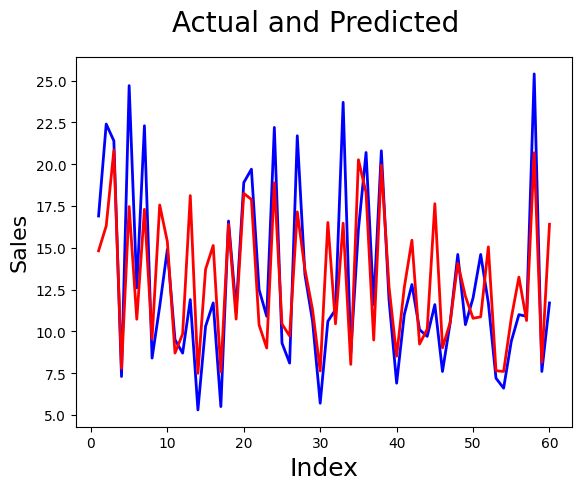

In [48]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label